In [2]:
import polars as pl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob

In [5]:
files = glob.glob("/run/media/mak/Heim/stats/V1/week8/logistic_regression/*.csv")
files

['/run/media/mak/Heim/stats/V1/week8/logistic_regression/logistic_regression_week8_90013_vs_90001_aluco.csv',
 '/run/media/mak/Heim/stats/V1/week8/logistic_regression/logistic_regression_week8_90014_vs_90002_capone.csv',
 '/run/media/mak/Heim/stats/V1/week8/logistic_regression/logistic_regression_week8_90018_vs_90006_aluco.csv',
 '/run/media/mak/Heim/stats/V1/week8/logistic_regression/logistic_regression_week8_90015_vs_90003_capone.csv',
 '/run/media/mak/Heim/stats/V1/week8/logistic_regression/logistic_regression_week8_90016_vs_90004_aluco.csv',
 '/run/media/mak/Heim/stats/V1/week8/logistic_regression/logistic_regression_week8_90017_vs_90005_capone.csv',
 '/run/media/mak/Heim/stats/V1/week8/logistic_regression/logistic_regression_week8_90019_vs_90007_aluco.csv',
 '/run/media/mak/Heim/stats/V1/week8/logistic_regression/logistic_regression_week8_90020_vs_90008_capone.csv',
 '/run/media/mak/Heim/stats/V1/week8/logistic_regression/logistic_regression_week8_90021_vs_90009_aluco.csv',
 '/run

In [34]:
aluco_files = [f for f in files if "aluco" in f]
capone_files = [f for f in files if "capone" in f]

_ = []
for file in aluco_files:
    df = pl.read_csv(file)
    for metric in ["AUROC_nadir", "AUROC_full", "AUROC_main"]:
        base = df.filter(pl.col("metric") == metric).select(pl.col("value")).item()
        for compare_metric in ["AUROC_nadir", "AUROC_full", "AUROC_main"]:
            if metric != compare_metric:
                compare = df.filter(pl.col("metric") == compare_metric).select(pl.col("value")).item()
                delta_pct = (compare - base) / abs(base) * 100
                #add row to df
                new_row = df[0, :].with_columns(
                    pl.lit(f"pct_{compare_metric}-{metric}").alias("metric"),
                    pl.lit(delta_pct).alias("value")
                )
                df = pl.concat([df, new_row])
    _.append(df)
aluco_df = pl.concat(_)

_ = []
for file in capone_files:
    df = pl.read_csv(file)
    for metric in ["AUROC_nadir", "AUROC_full", "AUROC_main"]:
        base = df.filter(pl.col("metric") == metric).select(pl.col("value")).item()
        for compare_metric in ["AUROC_nadir", "AUROC_full", "AUROC_main"]:
            if metric != compare_metric:
                compare = df.filter(pl.col("metric") == compare_metric).select(pl.col("value")).item()
                delta_pct = (compare - base) / abs(base) * 100
                #add row to df
                new_row = df[0, :].with_columns(
                    pl.lit(f"pct_{compare_metric}-{metric}").alias("metric"),
                    pl.lit(delta_pct).alias("value")
                )
                df = pl.concat([df, new_row])
    _.append(df)
capone_df = pl.concat(_)


#aluco_df = pl.concat([pl.read_csv(f) for f in aluco_files])

#capone_df = pl.concat([pl.read_csv(f) for f in capone_files])
aluco_df.filter(pl.col("metric") == "pct_AUROC_full-AUROC_nadir")

section,metric,value,vza_bin,raa_bin,rank
str,str,f64,str,str,i64
"""AUROC""","""pct_AUROC_full-AUROC_nadir""",3.414019,null,null,null
"""AUROC""","""pct_AUROC_full-AUROC_nadir""",4.213886,null,null,null
"""AUROC""","""pct_AUROC_full-AUROC_nadir""",4.098752,null,null,null
"""AUROC""","""pct_AUROC_full-AUROC_nadir""",4.968918,null,null,null
"""AUROC""","""pct_AUROC_full-AUROC_nadir""",7.342198,null,null,null
"""AUROC""","""pct_AUROC_full-AUROC_nadir""",7.353708,null,null,null


In [16]:
indexs = aluco_df.select(pl.col("metric") == "Δ_full−nadir")
aluco_delta_nadir = aluco_df.filter(indexs["metric"])
aluco_delta_nadir

section,metric,value,vza_bin,raa_bin,rank
str,str,f64,str,str,i64
"""AUROC""","""Δ_full−nadir""",0.028788,null,null,null
"""AUROC""","""Δ_full−nadir""",0.036649,null,null,null
"""AUROC""","""Δ_full−nadir""",0.035306,null,null,null
"""AUROC""","""Δ_full−nadir""",0.044032,null,null,null
"""AUROC""","""Δ_full−nadir""",0.062753,null,null,null
"""AUROC""","""Δ_full−nadir""",0.063018,null,null,null


In [17]:
indexs = capone_df.select(pl.col("metric") == "Δ_full−nadir")
capone_delta_nadir = capone_df.filter(indexs["metric"])
capone_delta_nadir

section,metric,value,vza_bin,raa_bin,rank
str,str,f64,str,str,i64
"""AUROC""","""Δ_full−nadir""",0.041024,null,null,null
"""AUROC""","""Δ_full−nadir""",0.023605,null,null,null
"""AUROC""","""Δ_full−nadir""",0.042428,null,null,null
"""AUROC""","""Δ_full−nadir""",0.060097,null,null,null
"""AUROC""","""Δ_full−nadir""",0.077955,null,null,null
"""AUROC""","""Δ_full−nadir""",0.076448,null,null,null


In [28]:
capone_df

section,metric,value,vza_bin,raa_bin,rank
str,str,f64,str,str,i64
"""AUROC""","""AUROC_nadir""",0.747775,null,null,null
"""AUROC""","""AUROC_main""",0.770043,null,null,null
"""AUROC""","""AUROC_full""",0.7888,null,null,null
"""AUROC""","""AUROC_angle""",0.770043,null,null,null
"""AUROC""","""Δ_full−nadir""",0.041024,null,null,null
…,…,…,…,…,…
"""EffectSize""","""Cohen_d_bin""",-1.674942,"""20-40""","""-180--90""",1
"""EffectSize""","""Cohen_d_bin""",-1.600835,"""20-40""","""-90-0""",2
"""EffectSize""","""Cohen_d_bin""",-1.470067,"""40-60""","""-180--90""",3


In [35]:
def get_mean_and_se(df, metrics):
    stats_df = (
        df.filter(pl.col("metric").is_in(metrics))
        .group_by("metric")
        .agg([
            pl.col("value").mean().abs().alias("mean_value"),
            (pl.col("value").std() / pl.col("value").count().sqrt()).alias("se_value")
        ])
        .sort("mean_value", descending=True)
    )
    return stats_df



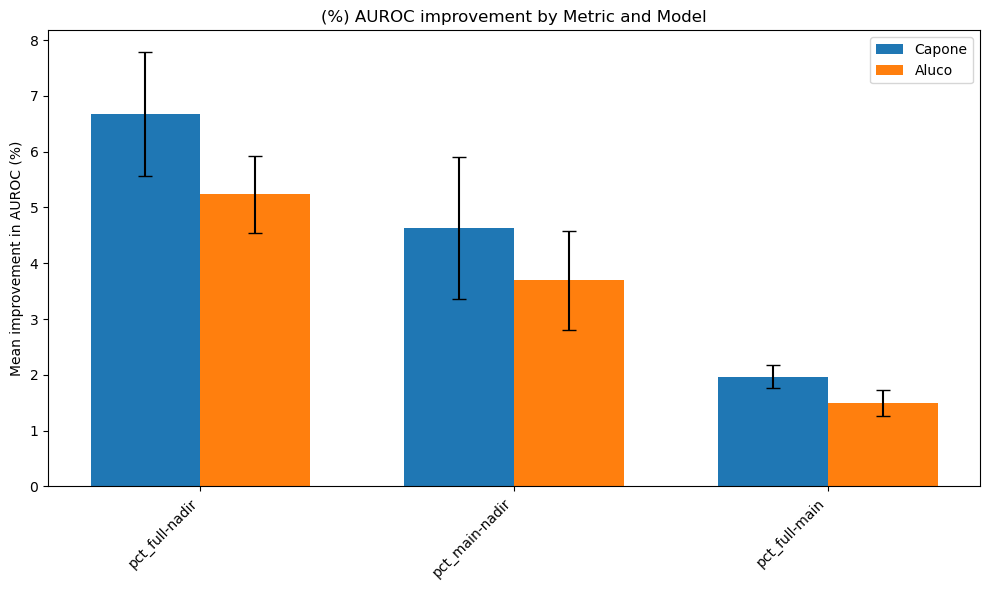

In [47]:
selected_metrics = ["pct_AUROC_full-AUROC_nadir", "pct_AUROC_main-AUROC_nadir", "pct_AUROC_full-AUROC_main"]
#better x tick labels
x_lables = {x : x.replace("AUROC_", "") for x in selected_metrics}


capone_stats = get_mean_and_se(capone_df, selected_metrics)
aluco_stats = get_mean_and_se(aluco_df, selected_metrics)

x = np.arange(len(capone_stats))
width = 0.35
fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, capone_stats["mean_value"], width, yerr=capone_stats["se_value"], capsize=5, label='Capone')
rects2 = ax.bar(x + width/2, aluco_stats["mean_value"], width, yerr=aluco_stats["se_value"], capsize=5, label='Aluco')
ax.set_title('(%) AUROC improvement by Metric and Model')
ax.set_xticks(x)
#add a pct in y lables
ax.set_ylabel('Mean improvement in AUROC (%)')


ax .set_xticklabels([x_lables[x] for x in capone_stats["metric"]], rotation=45, ha='right')
ax.legend()
fig.tight_layout()
plt.show()


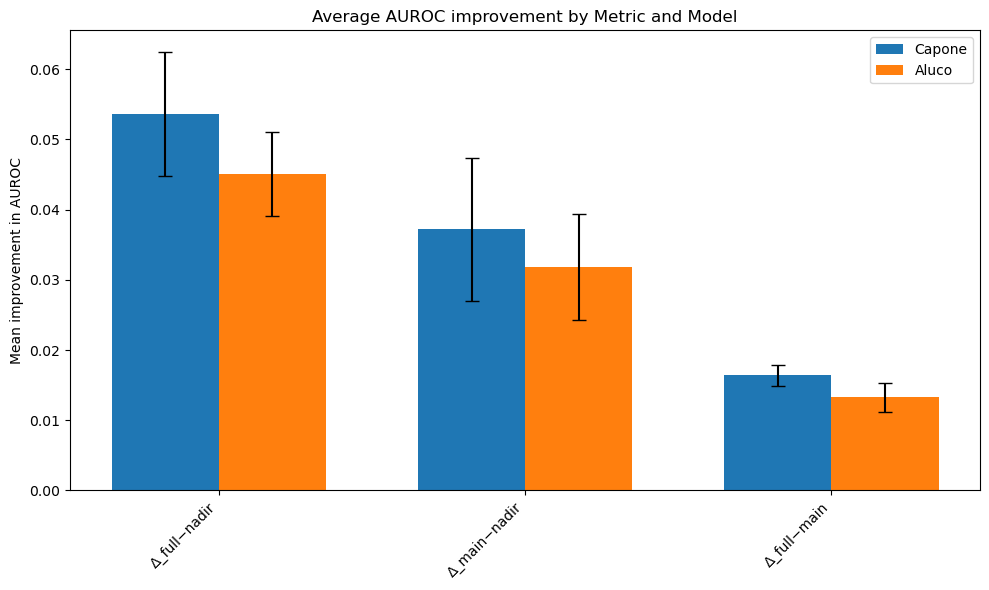

In [36]:

import scipy.stats as stats

selected_metrics = ["Δ_full−nadir", "Δ_main−nadir", "Δ_full−main"]

capone_stats = get_mean_and_se(capone_df, selected_metrics)
aluco_stats = get_mean_and_se(aluco_df, selected_metrics)

x = np.arange(len(capone_stats))
width = 0.35
fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, capone_stats["mean_value"], width, yerr=capone_stats["se_value"], capsize=5, label='Capone')
rects2 = ax.bar(x + width/2, aluco_stats["mean_value"], width, yerr=aluco_stats["se_value"], capsize=5, label='Aluco')
ax.set_ylabel('Mean improvement in AUROC')
ax.set_title('Average AUROC improvement by Metric and Model')
ax.set_xticks(x)
ax.set_xticklabels(capone_stats["metric"], rotation=45, ha='right')
ax.legend()
fig.tight_layout()
plt.show()


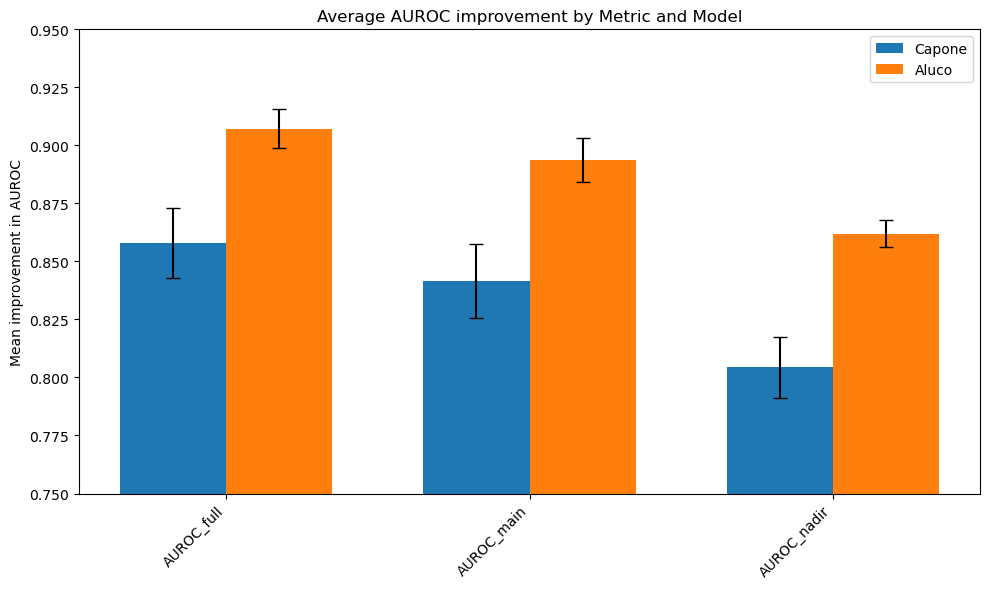

In [46]:
selected_metrics = ["AUROC_nadir", "AUROC_full", "AUROC_main"]

def get_mean_and_se(df, metrics):
    stats_df = (
        df.filter(pl.col("metric").is_in(metrics))
        .group_by("metric")
        .agg([
            pl.col("value").mean().abs().alias("mean_value"),
            (pl.col("value").std() / pl.col("value").count().sqrt()).alias("se_value")
        ])
        .sort("mean_value", descending=True)
    )
    return stats_df

capone_stats = get_mean_and_se(capone_df, selected_metrics)
aluco_stats = get_mean_and_se(aluco_df, selected_metrics)

x = np.arange(len(capone_stats))
width = 0.35
fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, capone_stats["mean_value"], width, yerr=capone_stats["se_value"], capsize=5, label='Capone')
rects2 = ax.bar(x + width/2, aluco_stats["mean_value"], width, yerr=aluco_stats["se_value"], capsize=5, label='Aluco')
ax.set_ylabel('Mean improvement in AUROC')
ax.set_title('Average AUROC improvement by Metric and Model')
ax.set_xticks(x)
ax.set_xticklabels(capone_stats["metric"], rotation=45, ha='right')
ax.set_ylim(0.75, 0.95 )  # Adjust these limits as needed
ax.legend()
fig.tight_layout()
plt.show()